Завантажимо дані keras-IMDB:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

def vectorize_sequences(sequences, dimenisions=10000):
  results = np.zeros((len(sequences), dimenisions))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [2]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [3]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5439 - accuracy: 0.7469 - val_loss: 0.4905 - val_accuracy: 0.7688
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.3178 - accuracy: 0.8858 - val_loss: 0.2945 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2290 - accuracy: 0.9197 - val_loss: 0.3099 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1783 - accuracy: 0.9364 - val_loss: 0.4285 - val_accuracy: 0.8410
Epoch 5/20
30/30 [==============================] - 2s 78ms/step - loss: 0.1561 - accuracy: 0.9443 - val_loss: 0.2933 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1285 - accuracy: 0.9542 - val_loss: 0.3128 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 2s 76ms/step - loss: 0.0937 - accuracy: 0.9701 - val_loss: 0.3524 - val_accuracy: 0.8831
Epoch 8/20
30

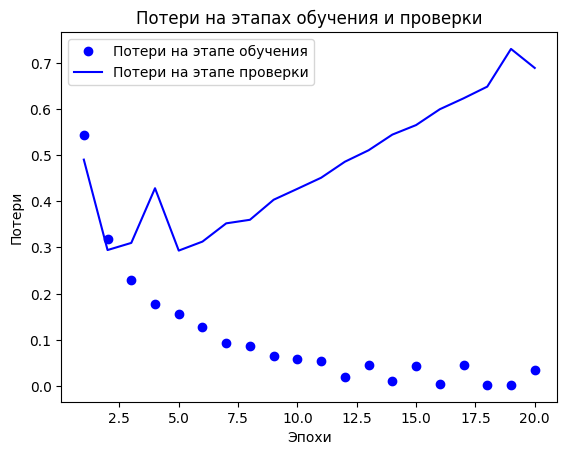

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

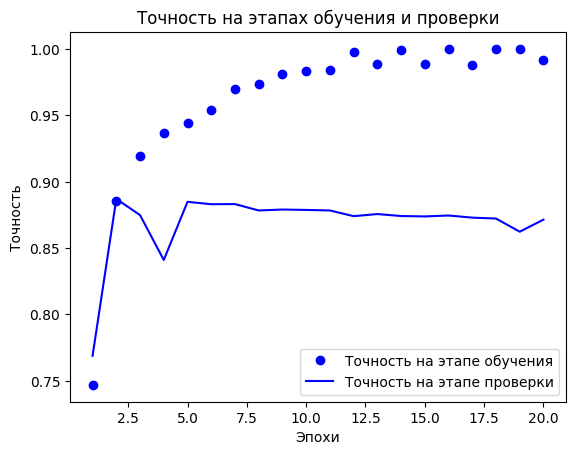

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()


In [9]:
##Исходя из полученных данных, необходимо обучить еще 1 модель, учитывая ошибки.
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 37ms/step - loss: 0.1585 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.0984 - accuracy: 0.8910
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.0790 - accuracy: 0.9076
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0869 - accuracy: 0.8850


In [10]:
results

[0.08692142367362976, 0.8849599957466125]

In [11]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.25123587],
       [0.9921026 ],
       [0.673747  ],
       ...,
       [0.11823958],
       [0.1201098 ],
       [0.34475154]], dtype=float32)